In [6]:
include("../partitions.jl")
using ProgressMeter, Plots
Random.seed!(2025)

TaskLocalRNG()

In [18]:
k = 5 
n = 10^k
reps = 200


200

In [21]:
lumped = lumped_burnside(n, n)
reflected = reflected_burnside(n, reps)

Progress: 100%|█████████████████████████████████████████| Time: 0:08:58


100000×200 SparseMatrixCSC{Integer, Int64} with 48166 stored entries:
⎡⡿⠿⎤
⎢⡃⠀⎥
⎢⡁⠀⎥
⎢⡂⠀⎥
⎢⠄⠀⎥
⎢⠄⠀⎥
⎢⠂⠀⎥
⎢⠁⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⠀⠀⎥
⎢⡀⠀⎥
⎣⡀⠀⎦

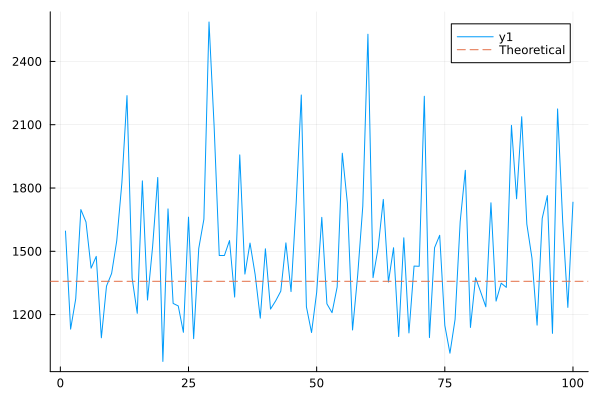

In [44]:
parts_lumped = [num_parts(lumped[:,i]) for i in 1:n if (i % 1000 == 0)]
parts_reflected = [num_parts(reflected[:,i]) for i in 1:reps]
burn_in = 10
mu = log(sqrt(6*n)/pi)*sqrt(6*n)/pi
plot(parts_lumped)
hline!([mu], linestyle=:dash, label="Theoretical")

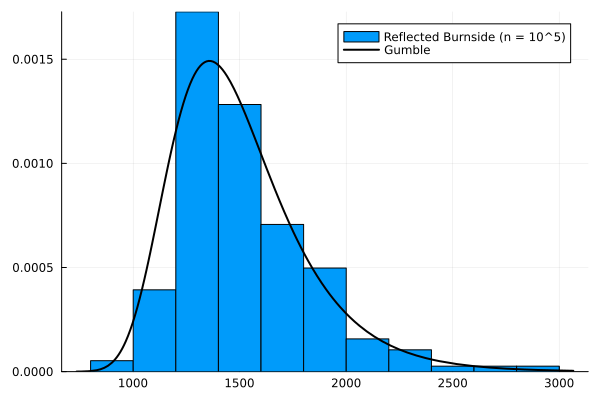

In [45]:
using Distributions
scale = sqrt(6*n)/pi 
loc = log(sqrt(6*n)/pi)*scale

hist = histogram(parts_reflected[10:end], normalize=true, label = "Reflected Burnside (n = 10^$k)")
gumble_cdf(x) = exp.(.-(x.-loc)./scale .- exp.(.-(x.-loc)./scale))./scale
plot!(hist, gumble_cdf, color =:black, linewidth=2, label = "Gumble")

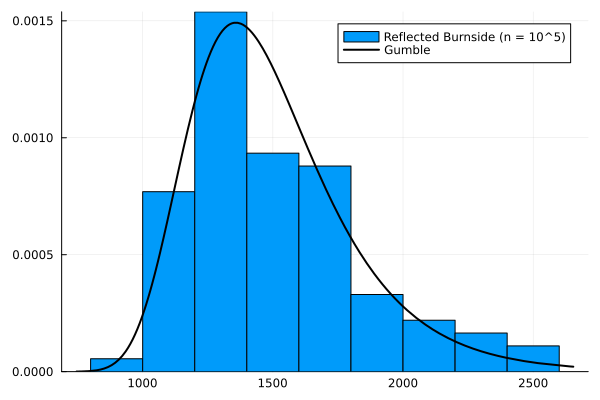

In [46]:
scale = sqrt(6*n)/pi 
loc = log(sqrt(6*n)/pi)*scale

hist = histogram(parts_lumped[10:end], normalize=true, label = "Reflected Burnside (n = 10^$k)")
gumble_cdf(x) = exp.(.-(x.-loc)./scale .- exp.(.-(x.-loc)./scale))./scale
plot!(hist, gumble_cdf, color =:black, linewidth=2, label = "Gumble")

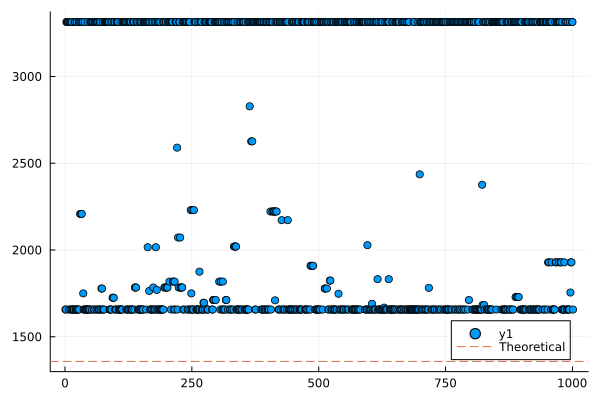

In [61]:
largest_lumped = [largest_part(lumped[:,i]) for i in 1:n]
mu = log(sqrt(6*n)/pi)*sqrt(6*n)/pi
scatter(largest_lumped[1000:2000])
hline!([mu], linestyle=:dash, label="Theoretical")

In [62]:
largest_lumped[1000]

1657

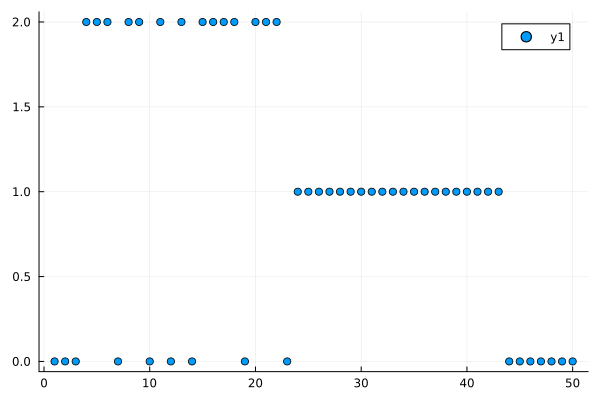

In [67]:
scatter(lumped[1657, 1:100:5000])

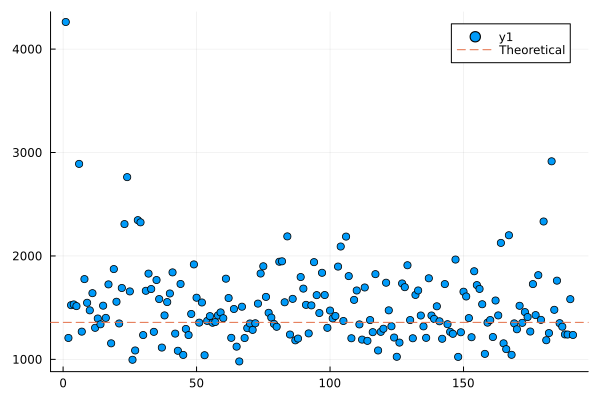

In [71]:
largest_reflected = [largest_part(reflected[:,i]) for i in 1:reps]
mu = log(sqrt(6*n)/pi)*sqrt(6*n)/pi
scatter(largest_reflected[10:end])
hline!([mu], linestyle=:dash, label="Theoretical")

In [76]:
sum(reflected, dims = 2)/reps

100000×1 Matrix{Float64}:
 744.605
 124.07
  83.025
  58.1
  46.79
  35.995
  36.525
  26.945
  25.605
  23.055
   ⋮
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.0
   0.005

In [1]:

scatter(burn_in:reps, parts_reflected[burn_in:reps], label = "Reflected Burnside")
hline!([mu], linestyle=:dash, label="Theoretical")

UndefVarError: UndefVarError: `burn_in` not defined